In [5]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.ticker as ticker
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

#dataPath = 'Path removed for privacy'

In [6]:
#read data
df1 = pd.read_csv(dataPath+'MichiganWolverinesFootballSeasons.csv', encoding = 'ISO-8859-1')
df2 = pd.read_csv(dataPath+'MichiganStateFootballSeasons.csv', encoding = 'ISO-8859-1')
df3 = pd.read_csv(dataPath+'OhioStateBuckeyesFootballSeasons.csv', encoding = 'ISO-8859-1')

In [135]:
joinedDf = df2[['Year', 'Pct']].merge(df3[['Year', 'Pct']],on='Year', suffixes=('_mist','_ohio'))
joinedDf = joinedDf.merge(df1[['Year', 'Pct']],on='Year')
joinedDf.set_index('Year', inplace=True)
joinedDf.sort_index(inplace=True)

joinedDf['mistMA'] = joinedDf['Pct_mist'].rolling(window=10).mean()*100
joinedDf['ohioMA'] = joinedDf['Pct_ohio'].rolling(window=10).mean()*100
joinedDf['MA'] = joinedDf['Pct'].rolling(window=10).mean()*100

<IPython.core.display.Javascript object>


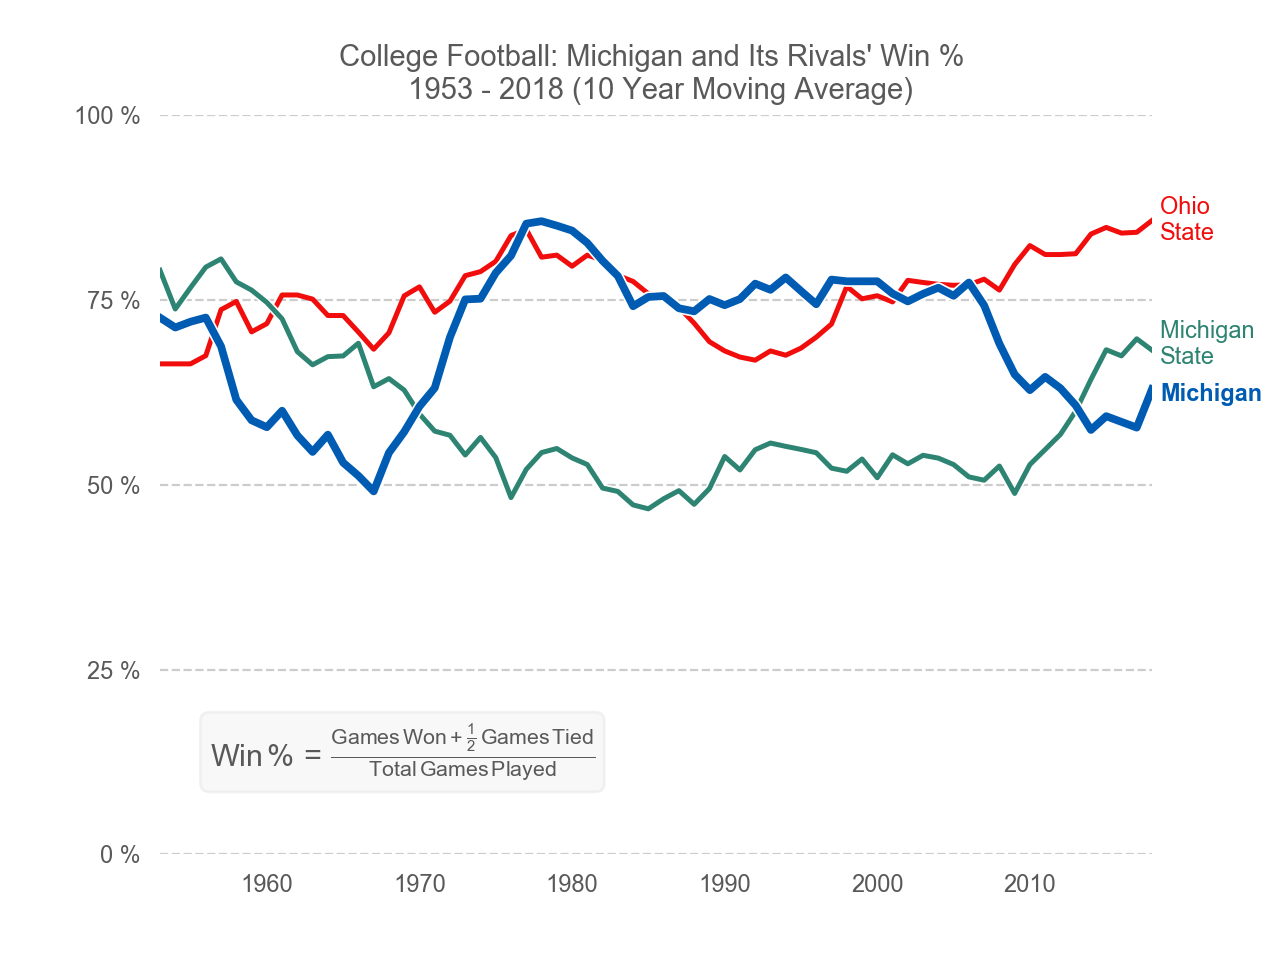

Text(0.5,1,"College Football: Michigan and Its Rivals' Win % \n 1953 - 2018 (10 Year Moving Average)")

In [330]:
#plotting
plt.rc('font', family='sans-serif')
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['mathtext.default'] = 'regular'

MiWvClr = '#005cb3'
MiStClr = '#2e8472'
OhStClr = '#f20d0d'
labelColor = '#595959'

y = joinedDf.loc[1953:2018]['MA']
y_ohio = joinedDf.loc[1953:2018]['ohioMA']
y_mist = joinedDf.loc[1953:2018]['mistMA']

fromulaStr = r'$Win\,\%\,=\,\frac{Games\,Won+\frac{1}{2}\,Games\,Tied}{Total\,Games\,Played}$'

fig, ax = plt.subplots()
ax.plot(y_ohio, color = OhStClr, linewidth=1.8 ,label = 'Ohio State')
ax.plot(y_mist, color = MiStClr, linewidth=1.8, label= 'Michigan State', path_effects=[pe.Stroke(linewidth=3, foreground='w'),pe.Normal()])
ax.plot(y, color = MiWvClr, linewidth=2.8, label = 'Michigan', path_effects=[pe.Stroke(linewidth=4, foreground='w'),pe.Normal()])

ax.set_ylim(bottom=0, top=100)
ax.yaxis.set_major_locator(ticker.FixedLocator([0,25,50,75,100]))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(u"{x:.0f} %"))
ax.yaxis.label.set_color(labelColor)
ax.tick_params(axis='y', colors=labelColor, left=False, labelsize=8.5)
ax.grid(True, axis='y', linestyle='--', color='#cccccc')

ax.set_xlim(left=1953, right=2018)
ax.xaxis.label.set_color(labelColor)
ax.tick_params(axis='x', colors=labelColor, bottom=False, labelsize=8.5)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

props = dict(boxstyle='round', facecolor='#f2f2f2', edgecolor='#e6e6e6', alpha=0.5)
ax.text(0.05, 0.18, fromulaStr, transform=ax.transAxes, fontsize=11,verticalalignment='top', color=labelColor, bbox=props)

for line, name in zip(ax.lines, ['Ohio \nState','Michigan \nState', 'Michigan']):
    y = line.get_ydata()[-1]
    if name=='Michigan':
        ax.annotate(name, xy=(1,y), xytext=(3,-2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=8.5, va="center", fontweight='bold')
    elif name=='Michigan \nState':
        ax.annotate(name, xy=(1,y), xytext=(3,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=8.5, va="center")
    else:
        ax.annotate(name, xy=(1,y), xytext=(3,0), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=8.5, va="center")

plt.title('College Football: Michigan and Its Rivals\' Win % \n 1953 - 2018 (10 Year Moving Average)', color = labelColor, size=10.5)